# Introduction to Pandas (reddit)


Full dataset at:

https://www.kaggle.com/colemaclean/subreddit-interactions

### Note about the dataset: each line represents ONE COMMENT

## Why Pandas

1. Very familiar interface / data model (Table / Excel)
2. Query data very interactively (once the data is loaded in your notebook, instant answer)
3. Complete freedom in creating custom code

GOOD TO KNOW
- Pandas is a massive library. Even after this class, there'll be a lot of things you won't know from pandas. Use the doc !


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/niparis/ga-intermediate-python-ds/master/datasets/reddit_100k.csv')

### Having a look at the data

head is a `method` of DataFrame objects. It is called by using the brackets.

head is equivalent to the SQL expression "LIMIT 5"

In [5]:
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09


We can pass a `parameter` to the `method` head. 

That's how we can control how many lines of the DataFrame `head` will display

In [6]:
# example with the parameter 2
df.head(2)

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09


### Let's start we some simple data cleaning

The utc timestamp is a EPOCH timestamp in seconds

Fortunately pandas has a built-in function to transform it to a more usable *datetime* object: `pd.to_datetime`

In [12]:
# cleaning the utc timestamp: a typical "data cleaning" operation
# the result from the expression on the right of the = is *assigned* to the left expression
# df['utc'] means "selecting the column utc from the dataframe df"
df['utc'] = pd.to_datetime(df['utc'],unit='s')

In [14]:
del df['new_utc']

In [15]:
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,2016-12-26 10:24:59
1,kabanossi,GetMotivated,2016-12-26 10:23:14
2,kabanossi,vmware,2016-12-26 10:21:16
3,kabanossi,carporn,2016-12-26 10:20:18
4,kabanossi,DIY,2016-12-26 10:17:59


### Let's create a new column containing only the date

We might need to have access to the date without the time information. 

It will let us aggregate the reddit data by day, to create for instance a daily timeline.

For this, we're going to use the `apply` DataFrame method. This is a very handy function that lets us modify a column in any way we want. To use it, first need to create a function that will be called on each element (or cell) of the column we want to transform.

In our case, we want to transform a `datetime` object into a `date` object, so we can write the following function:

In [31]:
def transform_to_date(bob: dt.datetime):
    # extract the date from a datetime. 
    # date is a method of the datetime object, that's why it has to be called with `()`
    return bob.date()

In [20]:
# def transform_to_date_BUG(elem: dt.datetime):
#     # extract the date from a datetime. 
#     # date is a method of the datetime object, that's why it has to be called with `()`
#     return elem.date

In [32]:
df['date'] = df['utc'].apply(transform_to_date)

In [34]:
del df['date_BUG']

In [30]:
bob.date()

datetime.date(2016, 12, 26)

Then we can apply the `transform_to_date` function to the utc column, and assign the result to a new column called `date`

In [7]:
df['date'] = df['utc'].apply(transform_to_date)
df.head(2)

,username,subreddit,utc,date
0,kabanossi,photoshopbattles,2016-12-26 10:24:59,2016-12-26
1,kabanossi,GetMotivated,2016-12-26 10:23:14,2016-12-26


Another example: week of year.
    
We create another function, apply it to the same `utc` column, and assign the result to a new column called `week_of_year`

In [35]:
def get_week_of_year(elem: dt.datetime):
    # weekofyear is an `attribute` from the pandas timestamp object (which is why it doesnt have to be called with `()`)
    return elem.weekofyear

df['week_of_year'] = df['utc'].apply(get_week_of_year)

## Group By

Pandas `groupby` is a powerful to perform aggregations on pandas DataFrames. It works very similarly to the SQL `GROUP BY` clause, with the added benefit of being able to define any custom aggregation function in python.

Let's start with a very simple aggregation: finding the number of comments per user.

Here's the logic of the groupby:
1. The argument of the `groupby` function (here: 'username') will be reduced to unique elements

```
df.groupby('username')
```
2. Then we select on which column we want to perform our aggregation. In our case, we want a count of comments, so any column will do:

```
df.groupby('username')['subreddit']
```

3. Finally, we select the aggregation method - in our case, a count:

```
df.groupby('username')['subreddit'].count()
```

In english, this reads:

*For each username, let's count the number of rows.*

In [38]:
# a typical groupby operation. Here we're adding sort_values and head methods to display the results nicely
df.groupby('username')['subreddit'].count().sort_values(ascending=False).head(10)


username
Spyrothedragon9972    1000
PumpTrump             1000
SidDriver             1000
bruux                 1000
Steel_Wool_Sponge     1000
SweelFor              1000
TalosThoren           1000
jackcalx              1000
TeslaAddict           1000
Tethalamin            1000
Name: subreddit, dtype: int64

#### Unique subreddits by username

We can reuse the same syntax, just changing the aggregation method

In [39]:
# How many unique subreddits per user
# in english: For each username, how many unique records can we find in the "subreddit" column
df.groupby('username')['subreddit'].nunique().sort_values(ascending=False).head(10)


username
xkcd_transcriber    496
Exuberant_Murica    188
kabanossi           187
Hcfielden           182
bigbuddha999        164
ZoomJet             154
fauxhb              154
bob-leblaw          142
gm4                 139
not_for_porns       127
Name: subreddit, dtype: int64

## Exercise 1

1. Extract the hour of day (ie: 10 for a datetime of 2016-12-26 10:24:59) and assign it to a new column ("hour_of_day")
2. Find the top 10 subreddits with the most users
3. Find which hour of the day is one average, generating more comments

In [48]:
### Type solution here

# 1 
s = df['utc'][0]

In [53]:
def transform_to_hour(s):
    return s.hour

df['hour_of_day'] = df['utc'].apply(transform_to_hour)

In [57]:

df.groupby('subreddit')['username'].nunique().sort_values(ascending=False).head(10)

subreddit
AskReddit         141
news              127
pics              124
funny             122
todayilearned     122
worldnews         116
videos            108
gifs              105
GetMotivated      100
Showerthoughts     99
Name: username, dtype: int64

In [61]:
df.groupby('hour_of_day')['subreddit'].count().sort_values(ascending=False).head(1)

hour_of_day
15    5855
Name: subreddit, dtype: int64

In [69]:
(df.groupby('hour_of_day')
   .agg({'subreddit': 'nunique'})
   .sort_values(by='subreddit', ascending=False)
   .head(1)
)

,subreddit
hour_of_day,
15,791


#### A more powerful syntax

pandas practitioners like to use the `.agg` method - it provides several benefits compared to the default syntax:
- Perform several aggregations on the same column
- Define the name of the results column
- Use standard python code rather than specific pandas functions


In [202]:
# Unique subreddits by username - as seen above
v0 = df.groupby('username')['subreddit'].nunique()
v0.head()

username
-goodguygeorge    106
01is               44
0mn17h3047         25
414D59             17
AbulaShabula       33
Name: subreddit, dtype: int64

#### The .agg function:

Using the `.agg` function: the argument of `.agg` is a _dictionary_ where the *keys* are the columns to aggregate on, 
and the values are the functions.


In [31]:
# In the v1, the value is a *string*, representing on of pandas default aggregation functions (here, the same nunique as
# we had been using above)
v1 = df.groupby('username').agg({'subreddit': 'nunique'})


# def foo(iamlist):
#     return len(set(iamlist))
# v1b = df.groupby('username').agg({'subreddit': foo})

# In v2, we're using a custom function (here a lambda function). Custom functions let us use any standard python code to 
# design our aggregation functions
# Here we reduce the aggregation to a set (which keep only unique items), and then we take the lenght of that set - which 
# is going to be the number of unique items
v2 = df.groupby('username').agg({'subreddit': lambda x: len(set(x))})

# v1 and v2 give the same results
(v1 == v2).head(10)

,subreddit
username,
-goodguygeorge,True
01is,True
0mn17h3047,True
414D59,True
AbulaShabula,True
Adjace-esque,True
Attentive_cactus,True
BasedOnAir,True
BrandEnlightened,True


### For each user, let's compute the number of comments per subreddit

Here are the steps to be able to compute this:
1. Get the comments and unique subreddits per username
2. Compute the ratio
3. Format results

First step: let's get the comments and unique subreddit in one operation


In [87]:
# The syntax to apply several aggregation on the same column is slightly different:
# we still pass a dictionnary to the `.agg` function, the key is still the column to aggregate on
# but the value becomes a *list* of tuples
# each tuple starting with the name of the result column, followed by the aggregation function
df2 = df.groupby('username').agg(
    {'subreddit': [
                    ('comments', lambda x: len(x)),
                    ('unique_subs', lambda x: len(set(x)))
                ],
    },    
)
df2.head()

subreddit            
                comments unique_subs
username                            
-goodguygeorge       978         106
01is                 353          44
0mn17h3047           211          25
414D59               117          17
AbulaShabula         363          33

In [90]:
# We get rid of the MultiIndex, it's making our life more complicated
# requires pandas 0.24 or later
df3 = df2.droplevel(axis='columns', level=0)

In [91]:
df3['comments_per_sub'] = df3['comments'] / df3['unique_subs']
df4 = df3.sort_values(by='comments_per_sub', ascending=False)
df4.head()

,comments,unique_subs,comments_per_sub
username,,,
Esstand,1000,8,125.000000
refugefirstmate,1000,12,83.333333
CyberHarassmentPanda,1000,14,71.428571
PumpTrump,1000,15,66.666667
decipedetimes10,1000,17,58.823529


### Filtering 

Filtering is quite straightforward. It uses the .loc, where the general syntax is:

```
df.loc[<column-selection>  <operator>  <value>]
```
1. `column-selection` is typically one clolumn from a database - ex: df['col']
2. `operator` is a standard python operator ( =, >, <, >=, != ...)
3. `value` can be a variable, a value, or another column


In [38]:
# A simple example, where we select all users who've made strictly less than 1000 comments
df4.loc[df4['comments'] < 1000].head()

,comments,unique_subs,comments_per_sub
username,,,
mr_fn_wonderful,999,21,47.571429
The_seph_i_am,986,32,30.812500
laserbong,804,29,27.724138
daze6,155,6,25.833333
Drums_And_Dreams,203,8,25.375000


### Using filtering to find active redditors

Let's use filtering to identify active redditors, which we'll define as users:
1. Not having exactly 1000 comments (this number looks artificial, let's remove it as a potential outlier)
2. Having either :
- Commented in at least 10 subreddits
- At least 3 comments per subreddit


In [92]:
# Then we find out who are the active users in our population by using this expresion. 
# Note:
# - the '&' signifies a lofgical AND
# - the '|' signifies a lofgical OR
active_redditors = df4.loc[
                           (df4['comments'] != 1000) & 
                            # note the use of brackets to isolate the OR expression
                           ((df4['unique_subs'] >= 10) | (df4['comments_per_sub'] >= 3))  
                          ]
msg = f'there are {len(active_redditors)} active redditors in our sample'
print(msg)

there are 120 active redditors in our sample


#### Exercise 2

1. Find each subreddit, find how many users have the string "trump" (case insensitive) in their name, and how many comments they have made
2. What are the top 10 subreddits who have the most comments made by users with "trump" in their name
3. Can you adapt the code to look for any string


In [98]:
## exercise code goes here

#1. Use apply
not_trump_user = df['username'][0]
trump_user = 'TrUmPvcudishviduohvl'

In [101]:
'trump' in not_trump_user

False

In [106]:
def check_trump(elem):
    return 'trump' in elem.lower()

In [108]:
df['is_trump'] = df['username'].apply(check_trump)



In [118]:

(df.loc[df['is_trump'] == True]
    .groupby('subreddit')
    .agg({'username': [('nb_users', lambda x: len(set(x))), ('nb_comments', lambda x: len(x))]})
    .droplevel(axis='columns', level=0)
    .sort_values(by='nb_comments', ascending=False)
     .head(10)
)


,nb_users,nb_comments
subreddit,,
The_Donald,2,935
politics,3,750
PoliticalDiscussion,2,317
news,3,174
worldnews,3,91
technology,1,73
environment,2,66
videos,2,56
houston,1,28


In [129]:
def check_token(elem, token):
    return token.lower() in elem.lower()

def find_top_10_with_token(df, token):
    df['is_token'] = df['username'].apply(check_token, args=(token,))
    
    return (df.loc[df['is_token'] == True]
         .groupby('subreddit')
         .agg({'username': [('nb_users', lambda x: len(set(x))), ('nb_comments', lambda x: len(x))]})
         .droplevel(axis='columns', level=0)
         .sort_values(by='nb_comments', ascending=False)
         .head(10)
    )

find_top_10_with_token(df, token='car')

,nb_users,nb_comments
subreddit,,
casualiama,1,266
nba,1,157
politics,2,127
changemyview,2,124
modelmakers,1,99
PoliticalDiscussion,1,97
NorthCarolina,1,89
education,1,66
pcmasterrace,1,63


,nb_comments
subreddit,
The_Donald,935
politics,750
PoliticalDiscussion,317
news,174
worldnews,91
technology,73
environment,66
videos,56
houston,28


In [238]:
#3. use functions
def had_token(username, token):
    if token.lower() in username.lower():
        return True


def get_results(token: str):
    token_col = f'is_{token}'    
    df[token_col] = df['username'].apply(had_token, args=(token,))

    return (df.loc[df[token_col] == True]
       .groupby('subreddit')
       .agg({'subreddit': 'count'})
       .rename(columns={'subreddit': 'nb_comments'})
       .sort_values(by='nb_comments', ascending=False)
       .head(10)
    ) 

get_results('cat')

,nb_comments
subreddit,
leagueoflegends,88
cringepics,44
bestoftribunal,21
LeagueOfGiving,20
mildlyinteresting,14
fffffffuuuuuuuuuuuu,13
WTF,10
LoLCodeTrade,10
CrappyDesign,9


In [169]:
## generic version



#### Exercise 3

1. Find the top 10 subreddits with the most users
2. For active redditors, find the median number of comments, the 25th and 75th percentile of unique_subs
3. Find the subreddit with the most comments in one hour (including the date component)
4. Plot a timeserie of:
    - Number of comments per day
    - Number of comments per day, only in subreddit where at least one "trump user" has commented, only comments written since 01 Jan 2016
5. [optional] Recompute the active redditors in a single expression    



In [151]:
## exercise code goes here
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1
df.groupby('subreddit')['username'].nunique().sort_values(ascending=False).head(10)

(df.groupby('subreddit')
   .agg({'username': lambda x: len(set(x))})
   .sort_values(by='username', ascending=False)
   .head(10)
)


,username
subreddit,
AskReddit,141
news,127
pics,124
funny,122
todayilearned,122
worldnews,116
videos,108
gifs,105
GetMotivated,100


In [157]:
### exercise 2 
# For active redditors, find the median number of comments, the 25th and 75th percentile of unique_subs
active_redditors
comments_25, comments_50, comments_75 = np.percentile(active_redditors['comments'], q=(25, 50, 75))
unique_subs_25, unique_subs_50, unique_subs_75 = np.percentile(active_redditors['unique_subs'], q=(25, 50, 75))

msg = f"""
Comments from active redditors: 25p {comments_25}, median {comments_50}, 75p {comments_75}
Unique Subs from active redditors: 25p {unique_subs_25}, median {unique_subs_50}, 75p {unique_subs_75}
"""
print(msg)


Comments from active redditors: 25p 95.75, median 264.0, 75p 602.0
Unique Subs from active redditors: 25p 20.0, median 34.0, 75p 57.25



In [172]:
## Exercise 3
# Find the subreddit with the most comments in one hour (including the date component)
(df.groupby(['subreddit', 'date', 'hour_of_day'])
   .agg({'utc': 'count'})
   .sort_values(by='utc', ascending=False)
   .head(1)
   .rename(columns={"utc": 'nb_comments'})
)   

,,,nb_comments
subreddit,date,hour_of_day,
news,2016-12-26,15,108


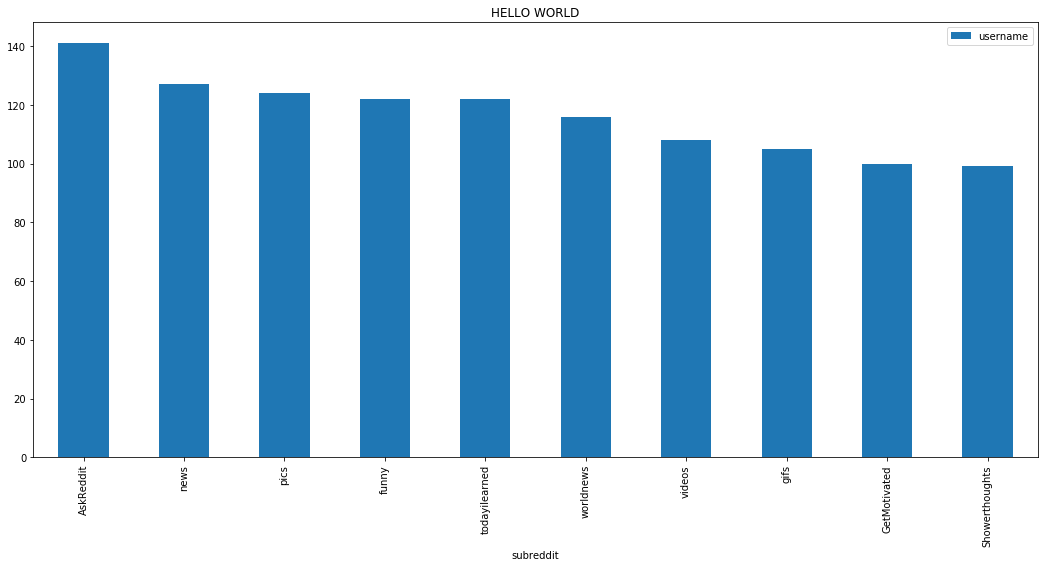

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

## exercise 4
to_plot = (df.groupby('subreddit')
   .agg({'username': lambda x: len(set(x)) })
   .sort_values(by='username', ascending=False)
   .head(10)
)  

to_plot.plot(figsize=(18, 8), kind='bar', title='HELLO WORLD')


In [189]:
## HINTS 5
# [optional] Recompute the active redditors in a single expression 
def filter_pipe(df):
    return df.loc[
           (df['comments'] != 1000) & 
            # note the use of brackets to isolate the OR expression
           ((df['unique_subs'] >= 10) | (df['comments_per_sub'] >= 3))  
          ]    

len(df.groupby('username').agg(
        {'subreddit': [
                        ('comments', lambda x: len(x)),
                        ('unique_subs', lambda x: len(set(x)))
                    ],
        },)
     .droplevel(level=0, axis='columns')
     .assign(comments_per_sub=lambda x: x['comments'] / x['unique_subs'])
     .sort_values(by='comments_per_sub', ascending=False)
     .pipe(filter_pipe)
)



120

In [270]:
# 2. For active redditors, find the median number of comments, 
# the 25th and 75th percentile of unique_subs
# 2. function for active_redditors
# np.median



Stats for comments: 
+ p25: 95.75, p50: 264.0, p75: 602.0

Stats for unique subs: 
+ p25: 20.0, p50: 34.0, p75: 57.25



In [275]:
# 3. combination of date + hour


,,,comments
subreddit,date,hour,
news,2016-12-26,15,108


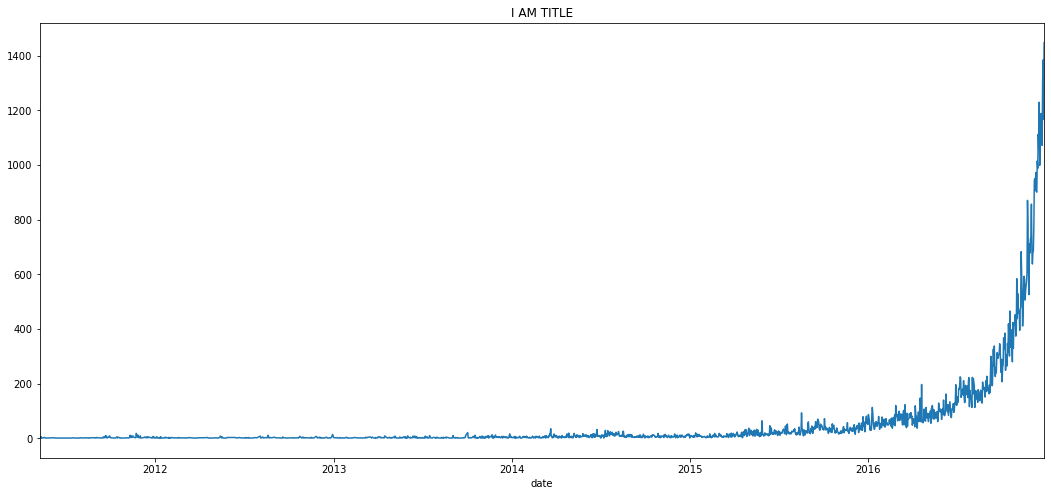

In [294]:
#4. Plot a timeserie of:
#    - Number of comments per day
#    - Number of comments per day, only in subreddit where at least one "trump user" has commented, only comments written since 01 Jan 2016    


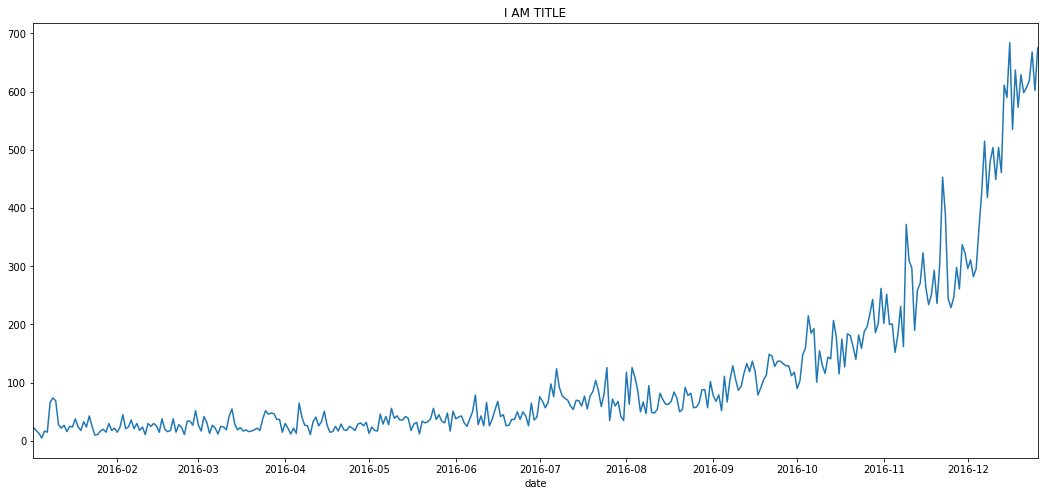

In [292]:
def is_trump(username):
    if 'trump' in username.lower():
        return True
    
df['is_trump'] = df['username'].apply(is_trump)
subs_trump = set(df.loc[df.is_trump == True, 'subreddit'])

(df.loc[(df.subreddit.isin(subs_trump)) & (df.date > dt.date(2016, 1, 1))]
   .groupby('date')['username']
   .count()
   .sort_values(ascending=False)
   .plot(kind='line', figsize=(18,8), title='I AM TITLE')
) 

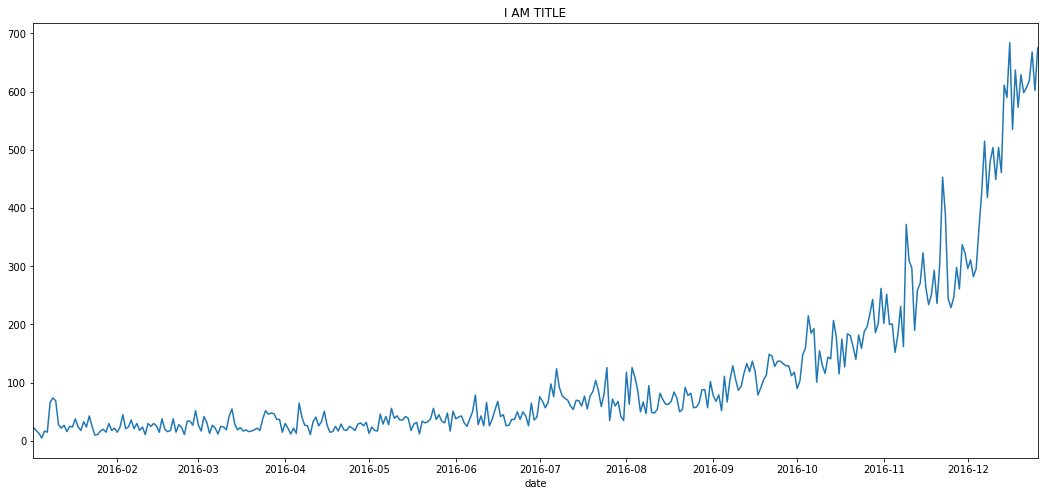

In [295]:
subs_trump = set(df.loc[df.is_trump == True, 'subreddit'])

(df.loc[(df['subreddit'].apply(lambda x: x in subs_trump)) & (df.date > dt.date(2016, 1, 1))]
   .groupby('date')['username']
   .count()
   .sort_values(ascending=False)
   .plot(kind='line', figsize=(18,8), title='I AM TITLE')
) 

In [312]:
def custom_filter_active_redditors(df):
    return df.loc[(df['unique_subs'] >= 10) | (df['nb_comments_per_sub'] >= 3)]


(df.groupby('username')
    .agg(
        {'subreddit': [
                        ('comments', lambda x: len(x)),
                        ('unique_subs', lambda x: len(set(x)))
                    ],
        },    
    )
     .droplevel(axis='columns',level=0)
     .assign(nb_comments_per_sub=lambda x: x['comments'] / x['unique_subs'])
     .sort_values(by='nb_comments_per_sub', ascending=False)
     .query('comments != 1000')
     .pipe(custom_filter_active_redditors)
) 

,comments,unique_subs,nb_comments_per_sub
username,,,
mr_fn_wonderful,999,21,47.571429
The_seph_i_am,986,32,30.812500
laserbong,804,29,27.724138
daze6,155,6,25.833333
Drums_And_Dreams,203,8,25.375000
BrandEnlightened,426,20,21.300000
QuatreBarton,336,16,21.000000
cragfar,747,36,20.750000
quickquestionandaway,185,9,20.555556


In [249]:




# 3. [harder but useful] Recompute the active redditors in a single expression

# We use "method chaining" to avoid intermediate dataframes
# Advantages:
# 1. Avoids mistakes (easy to make errors when you reach df42)
# 2. You can read all the logic step by step

def custom_filter(df):
    return df.loc[ (df['comments'] != 1000) & 
                    # note the use of brackets to isolate the OR expression
                   ((df['unique_subs'] >= 10) | (df['comments_per_sub'] >= 3))  
                  ]    
    

active_redditors = \
(df.groupby('username')
   .agg({'subreddit': [('comments', 'count'),
                       ('unique_subs', lambda x: len(set(x))),
                      ]
        })
    .droplevel(axis='columns', level=0)
    .assign(comments_per_sub=lambda x: x['comments'] / x['unique_subs'])
    .sort_values(by='comments_per_sub', ascending=False)
    .pipe(custom_filter)
)
active_redditors.head()

,comments,unique_subs,comments_per_sub
username,,,
mr_fn_wonderful,999,21,47.571429
The_seph_i_am,986,32,30.812500
laserbong,804,29,27.724138
daze6,155,6,25.833333
Drums_And_Dreams,203,8,25.375000


In [81]:
## Top 10 subreddit with most users
df.groupby('subreddit').agg({'username': lambda x: len(set(x))}).sort_values(by='username', ascending=False).head(10)

,username
subreddit,
AskReddit,141
news,127
pics,124
funny,122
todayilearned,122
worldnews,116
videos,108
gifs,105
GetMotivated,100


In [170]:
## 2: Unique subs of active redditors: q1/med/q3


In [171]:
## 2. Comments of active redditors : : q1/med/q3


In [172]:
## 3. subreddit with the most comment in one hour


In [173]:
# 5. [harder but useful] Recompute the active redditors in a single expression

# We use "method chaining" to avoid intermediate dataframes
# Advantages:
# 1. Avoids mistakes (easy to make errors when you reach df42)
# 2. You can read all the logic step by step



# Solutions

## Exercise 1

1. Extract the hour of day (ie: 10 for a datetime of 2016-12-26 10:24:59) and assign it to a new column ("hour_of_day")
2. Find the top 10 subreddits with the most users
3. Find which hour of the day is one average, generating more comments

In [ ]:
# 1.1: extract the hour of day
def get_hour_of_day(elem):
    return elem.hour
                    
df['hour_of_day'] = df['utc'].apply(get_hour_of_day)
df.head()

In [ ]:
# 1.2: find the top 10 subreddits with the most users
df.groupby('subreddit').agg({'username': 'nunique'}).sort_values(by='username', ascending=False).head(10)

In [ ]:
# 3. Find which hour of the day is one average, generating more comments
df.groupby('hour_of_day').agg({'subreddit': 'count'}).sort_values(by='subreddit', ascending=False).head()

## Exercise 2

### Solution 2.A: using known syntax

In [ ]:
def get_token(elem, token):
    return token.lower() in elem.lower()

# Create a dataframe containing only users with "trump" in their name
df['trump_user'] = df['username'].apply(get_token, args=['trump'])
df_trump = df.loc[df['trump_user'] == True]
df_trump.head()

In [ ]:
# creating the groupbys
trump_agg = (df_trump.groupby('subreddit')
         .agg({'username': [
             ('nb_comments_by_trump', 'count'),
             ('nb_user_w_trump', 'nunique')
         ]})
)
trump_agg.head()

In [ ]:
# cleaning and sorting
final = trump_agg.droplevel(axis='columns', level=0)
final.sort_values(by=f'nb_comments_by_trump', ascending=False).head(10)

### Solution 2.B : a cleaner way

In [ ]:
token = 'trump'
mask = df['username'].str.contains(token, case=False)
(df.loc[mask]
    .groupby('subreddit')
    .agg({'username': [
            (f'nb_comments_by_{token}', 'count'),
            (f'nb_users_w_{token}', 'nunique'),
    ]
         })
     .droplevel(axis='columns', level=0)
    .sort_values(by=f'nb_comments_by_{token}', ascending=False)
    .head(10)
)

## Exercise 3

1. For active redditors, find the median number of comments, the 25th and 75th percentile of unique_subs
2. Find the subreddit with the most comments in one hour
3. [harder but useful] Recompute the active redditors in a single expression


In [ ]:
# 1. For active redditors, find the median number of comments, the 25th and 75th percentile of unique_subs
median_comments = active_redditors['comments'].median()
p25_subs = np.percentile(active_redditors['unique_subs'], 25)
p75_subs = np.percentile(active_redditors['unique_subs'], 75)

msg = f"""Here are the stats on active reddits:
A. Comments per subredit:
- mediam: {median_comments}
B. Number of subreddits they subscribe to:
- p25: {p25_comments}
- p75: {p75_comments}
"""

print(msg)

In [ ]:
# 2. Find the subreddit with the most comments in one hour
def per_hour(elem: dt.datetime):
    return f'{elem.date()}_{elem.hour}'

df['per_hour'] = df['utc'].apply(per_hour)
df.groupby(['per_hour', 'subreddit'])['username'].count().sort_values(ascending=False).head()

In [ ]:
# 3. [harder but useful] Recompute the active redditors in a single expression

# We use "method chaining" to avoid intermediate dataframes
# Advantages:
# 1. Avoids mistakes (easy to make errors when you reach df42)
# 2. You can read all the logic step by step

active_redditors = \
(df.groupby('username')
   .agg({'subreddit': [('comments', 'count'),
                       ('unique_subs', lambda x: len(set(x))),
                      ]
        })
    .droplevel(axis='columns', level=0)
    .assign(comments_per_sub=lambda x: x['comments'] / x['unique_subs'])
    .sort_values(by='comments_per_sub', ascending=False)
    .query('comments < 1000')
    .query('unique_subs >= 10')
    .query('comments_per_sub >= 3') 
)
active_redditors.head()